<a href="https://colab.research.google.com/github/chaitu2568/DEEP-LEARNING/blob/master/Tranfer_Learning_(ALEX_NET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
from torchvision import datasets,transforms,models
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F

In [0]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [9]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [10]:
!ls ants_and_bees/train


ants  bees


In [0]:
# Applying the transformations to the data
# 1->Numpy to Tensor(returns float values ranging from 0 to 1)
# 2->Normalising the values by setting mean=0.5 and sd=0.5 for ColorScale,Width and Height of Image (returns values ranging from (-1,1))




# Random Transformations are applied for the data Augmentation process such that each image is
# -added in the training data in different variations(De-colorized, Flips,Rotates, Scaling, Color, brightness, saturation)

#since the data is fed into model which is already trained by using million image data set
# and the size of the image is 224 * 224

transform_train=transforms.Compose([transforms.Resize((224,224)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),
                                    transforms.ColorJitter(brightness=1,contrast=1,saturation=1),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5,),(0.5,))
                                      ])
                                                
transform=transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])



# Datasets are taken from the MNIST dataset

#image folder Classifies images mentioned i
train_data=datasets.ImageFolder('ants_and_bees/train',transform=transform_train)

validation_data=datasets.ImageFolder('ants_and_bees/val',transform=transform)
# laoding the datasets batch wise for each epoch
train_load=torch.utils.data.DataLoader(dataset=train_data,batch_size=20,shuffle=True) #to avoid the Local Minimum
validation_load=torch.utils.data.DataLoader(dataset=validation_data,batch_size=20,shuffle=False)

In [0]:
# Now to plot the graph covert back into Tensor

def img_convert(tensor):
#   first cloning and coverting into numpy array
  image=tensor.cpu().clone().detach().numpy()
#   changing dimensions from 1,28,28 to 28,28,1
  image=image.transpose(1,2,0)  
#   deNormalizing it by multiplying with sd and adding mean
  image=image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
#   changing the range from 0 to 1
  image=image.clip(0,1)
  return image

In [0]:
# !pip install pillow==4.0.0

In [0]:
classes=['ANT','BEE']

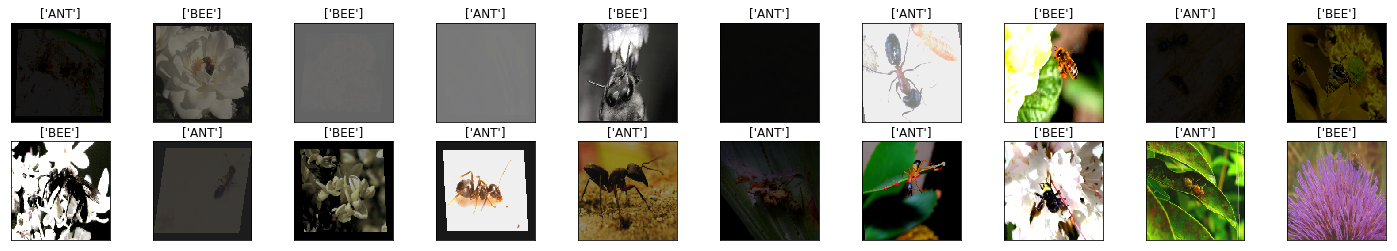

In [43]:
# train_load=transforms.ToPILImage()(train_load)
dataiter=iter(train_load)
images,labels = dataiter.next() #loads 100 batchsize of data for every iteration
main=plt.figure(figsize=(25,4))


for index in np.arange(20):
  ax=main.add_subplot(2,10,index+1,xticks=[], yticks=[])
  plt.imshow(img_convert(images[index]))
  ax.set_title([classes[labels[index].item()]])
  
  

In [0]:
#Importing Alex net model which is fully trained model on previous dataset
#This pretrained parameter means that the model paramnetrs are already optimal
obj=models.alexnet(pretrained=True)



In [45]:
obj


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:

# Then these parameters are freezed and not affected by the back-propagation(i.e. they remains same)
for parameter in obj.features.parameters():
  parameter.requires_grad=False

In [47]:
# Changing the final Layer outputs to 2 classes
import torch.nn as nn
inputs=obj.classifier[6].in_features
final_layer=nn.Linear(inputs,len(classes))
obj.classifier[6]=final_layer
obj.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [48]:
print(obj)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(obj.parameters(),lr=0.0001)

In [50]:
epochs=10

train_loss=[]
train_accuracy=[]
validation_loss=[]
validation_accuracy=[]
for ite in range(epochs):
  epoch_loss=0
  epoch_accuracy=0
  batch_loss=0
  batch_accuracy=0
  
#   validation constraints
  epoch_val_loss=0
  epoch_val_accuracy=0
  batch_val_accuracy=0
  batch_val_loss=0

  for images, labels in train_load:
    images=images.to(device)
    labels=labels.to(device)
#     images=images.view(images.shape[0],-1)
    results=obj(images)
    loss=criterion(results,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    batch_loss+=loss.item() 
    _,preds=torch.max(results,1)
    batch_accuracy+=torch.sum(preds==labels.data)
    
    
  else:
    for val_img, val_lab in validation_load:
      val_img=val_img.to(device)
      val_lab=val_lab.to(device)
#       val_img=val_img.view(val_img.shape[0],-1)
      val_results=obj(val_img)
      val_loss=criterion(val_results,val_lab)
      
      batch_val_loss+=val_loss.item() 
      _,val_preds=torch.max(val_results,1)
      batch_val_accuracy+=torch.sum(val_preds==val_lab.data)
    
      
      
    epoch_val_loss=batch_val_loss/len(validation_load.dataset)
    validation_loss.append(epoch_val_loss)
    epoch_val_accuracy=batch_val_accuracy.float()/len(validation_load.dataset)
    validation_accuracy.append(epoch_val_accuracy)
    
      
    epoch_loss=batch_loss/len(train_load.dataset)
    train_loss.append(epoch_loss)
    epoch_accuracy=batch_accuracy.float()/len(train_load.dataset)
    train_accuracy.append(epoch_accuracy)
    
    print('Present Epoch:',ite)
    print('Validation Loss: {:.4f}, Validation Accuracy: {:.4f}'.format(epoch_val_loss,epoch_val_accuracy.item()))
    print('Training Loss: {:.4f}, Training Accuracy: {:.4f}'.format(epoch_loss,epoch_accuracy.item()))
    

Present Epoch: 0
Validation Loss: 0.0198, Validation Accuracy: 0.8105
Training Loss: 0.0372, Training Accuracy: 0.6189
Present Epoch: 1
Validation Loss: 0.0166, Validation Accuracy: 0.8693
Training Loss: 0.0239, Training Accuracy: 0.7459
Present Epoch: 2
Validation Loss: 0.0173, Validation Accuracy: 0.8693
Training Loss: 0.0212, Training Accuracy: 0.8320
Present Epoch: 3
Validation Loss: 0.0164, Validation Accuracy: 0.8954
Training Loss: 0.0216, Training Accuracy: 0.7992
Present Epoch: 4
Validation Loss: 0.0206, Validation Accuracy: 0.8562
Training Loss: 0.0196, Training Accuracy: 0.8115
Present Epoch: 5
Validation Loss: 0.0175, Validation Accuracy: 0.8889
Training Loss: 0.0218, Training Accuracy: 0.8115
Present Epoch: 6
Validation Loss: 0.0168, Validation Accuracy: 0.8889
Training Loss: 0.0178, Training Accuracy: 0.7992
Present Epoch: 7
Validation Loss: 0.0169, Validation Accuracy: 0.8693
Training Loss: 0.0200, Training Accuracy: 0.7992
Present Epoch: 8
Validation Loss: 0.0179, Valida

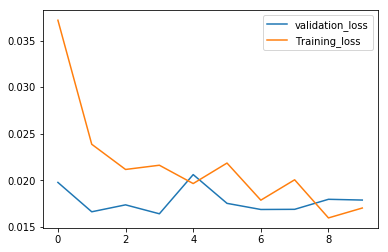

In [51]:
plt.plot(validation_loss,label='validation_loss')
plt.plot(train_loss,label='Training_loss')
plt.legend()

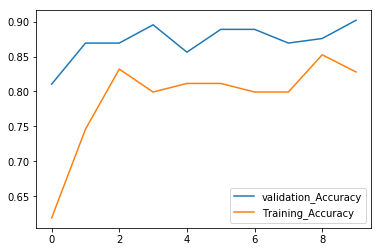

In [52]:
plt.plot(validation_accuracy,label='validation_Accuracy')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.legend()

In [53]:
print(type(validation_load))

<class 'torch.utils.data.dataloader.DataLoader'>


In [0]:
import PIL.ImageOps

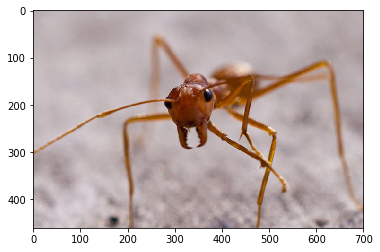

In [55]:
import requests
from PIL import Image

url = 'https://www.sciencealert.com/images/2017-09/regular-ant-mandible-flickr.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

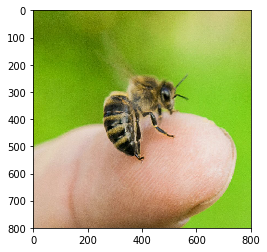

In [58]:
url = 'https://carolinahoneybees.com/wp-content/uploads/2017/02/worker-bee-stinger.jpg'
response1 = requests.get(url, stream = True)
img1 = Image.open(response1.raw)
plt.imshow(img1)

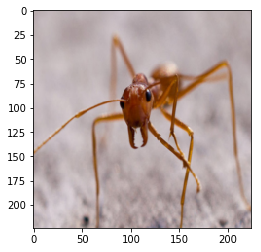

In [56]:
img=transform(img)
plt.imshow(img_convert(img))


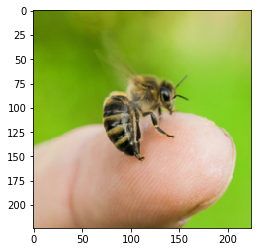

In [59]:
img1=transform(img1)
plt.imshow(img_convert(img1))


In [57]:
img=img.to(device).unsqueeze(0)
result=obj(img)
_,preds=torch.max(result,1)
print(classes[preds.item()])

ANT


In [60]:
img1=img1.to(device).unsqueeze(0)
result1=obj(img1)
_,preds1=torch.max(result1,1)
print(classes[preds1.item()])

BEE


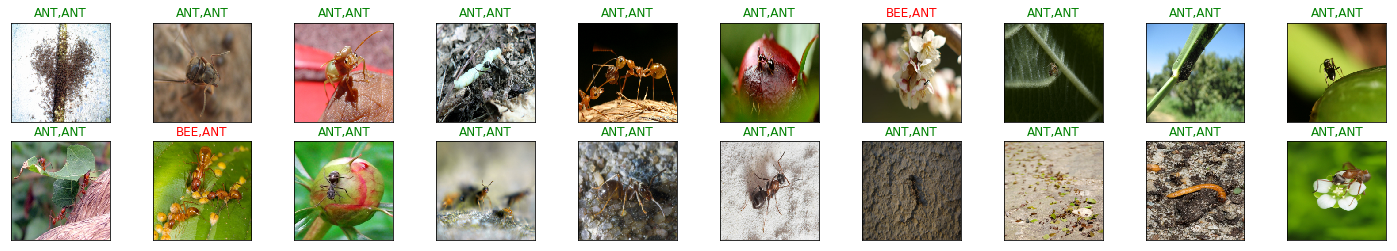

In [62]:
dataiter=iter(validation_load)
images,labels = dataiter.next() #loads 100 batchsize of data for every iteration
images=images.to(device)
labels=labels.to(device)
# images_=images.view(images.shape[0],-1)
results=obj(images)
_,predics=torch.max(results,1)
main=plt.figure(figsize=(25,4))
for index in np.arange(20):
  ax=main.add_subplot(2,10,index+1,xticks=[], yticks=[])
  plt.imshow(img_convert(images[index]))
  ax.set_title('{},{}'.format(str(classes[predics[index].item()]),str(classes[labels[index].item()])),color=('green'if predics[index]==labels[index] else 'red'))